In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def regstepx(X,t,B,a): # Logic Activation (Step Function)
    return B - (a*X)

def hillfuncact(X,K,n): # Hill function for activator
    return (X**n)/((K**n)+(X**n))

def reghilly(Y,t,X,B,a,K,n): # Hill Activation (Single Regulation)
    return B*hillfuncact(X,K,n)-(a*Y)

def reghillz(Z,t,X,Y,B,a,K1,K2,n,rep): # Hill Activation (AND function)
    if rep == True: # Check if Y is repressor for Z
        return (B*(hillfuncact(X,K1,n)*(1-hillfuncact(Y,K2,n))))-(a*Z)
    else:
        return (B*(hillfuncact(X,K1,n)*hillfuncact(Y,K2,n)))-(a*Z)

In [3]:
# function for calculating Z1, Z2, Z3 simultaneoulsly
def rate_z1z2z3(u,t,B,a,K,n):
    x1, x2, y1, y2, z1, z2, z3 = u
    dx1dt = regstepx(x1,t,B,a)
    dy1dt = reghilly(y1,t,x1,B,a,K,n)
    dx2dt = reghillz(x2,t,x1,y1,B,a,K,K,n,False)
    dz1dt = reghillz(z1,t,x1,y1,B,a,K,K,n,True)
    dy2dt = reghilly(y2,t,x2,B,a,K,n)
    dz2dt = reghillz(z2,t,x2,y2,B,a,K,K,n,True)
    dz3dt = reghillz(z3,t,x2,y2,B*0.68,a,K,K,n,False)
    
    return [dx1dt, dx2dt, dy1dt, dy2dt, dz1dt, dz2dt, dz3dt]

In [4]:
# Here we have considered same parameters for all genes
B = 1
a = 1
K = 0.7
n = 50

t = np.linspace(0,30,100)

U = odeint(rate_z1z2z3,[0,0,0,0,0,0,0],t,args=(B,a,K,n))

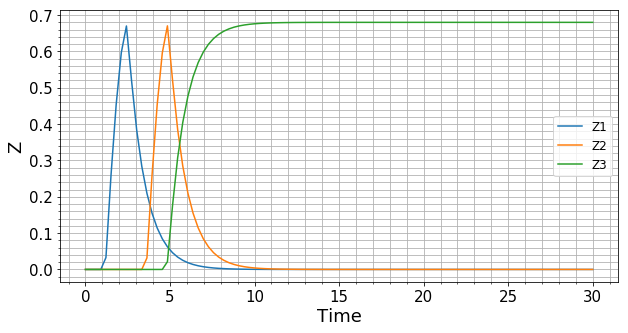

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
#ax.plot(t,U[:,0],label='X1')
#ax.plot(t,U[:,1],label='X2')
#ax.plot(t,U[:,2],label='Y1')
#ax.plot(t,U[:,3],label='Y2')
ax.plot(t,U[:,4],label='Z1')
ax.plot(t,U[:,5],label='Z2')
ax.plot(t,U[:,6],label='Z3')

ax.grid(which='both')
ax.minorticks_on()
ax.legend(loc='best',fontsize=12)
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Z', fontsize=18)
ax.tick_params(labelsize=15)